# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

## Count examples and classes, and inspect image shape

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

## Plot histogram of examples with respect to classes

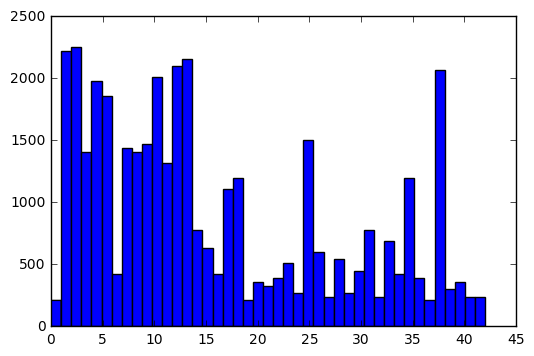

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(train['labels'], n_classes)
plt.show()

## Find an example from each class

In [5]:
images = []
for n in range(n_classes):
    for idx in range(n_train):
        if train['labels'][idx] == n:
            images.append(train['features'][idx])
            if n == 8:
                print(idx)
            break

11790


## Show an example from each class

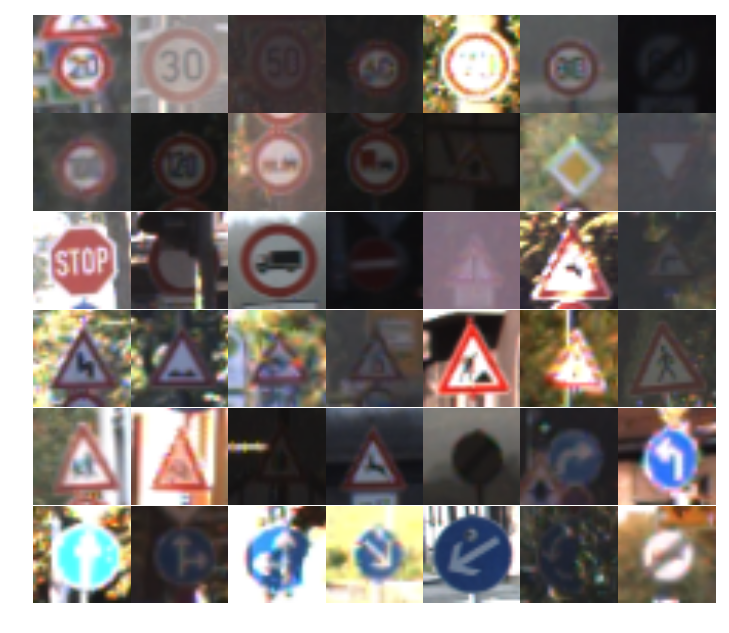

In [6]:
fig = plt.figure(figsize=(8.8, 7.6))
for k in range(n_classes - 1):
    a=fig.add_subplot(6,7,k+1)
    img = images[k]
    plt.axis('off')
    imgplot = plt.imshow(img)
plt.subplots_adjust(wspace=0, hspace=0)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

## Shuffle examples and convert to grayscale

18


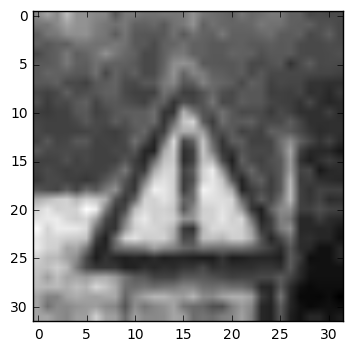

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.utils import shuffle

def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

X_train_s, y_train_s = shuffle(X_train, y_train)
X_test_s, y_test_s = shuffle(X_test, y_test)

X_train_gray_s = [rgb2gray(img).reshape(32,32,1) for img in X_train_s]
X_test_gray_s = [rgb2gray(img).reshape(32,32,1) for img in X_test_s]

example = 2422 # "Ahead only"
imgplot = plt.imshow(X_train_gray_s[example].reshape(32,32), cmap='gray')
print(y_train_s[example])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I converted the images to grayscale because Pierre Sermanet and Yann LeCun (the authors of the above paper) achieved better results with grayscale images. Converting input images to grayscale reduces the time required to train the model and reduces the risk of overfitting. The conversion to grayscale does this by reducing the number of input nodes and thus the number of trained parameters. Since color is unimportant in this dataset, leaving the images in color would waste time and risk fitting the model to color.

I also shuffled the dataset to ensure that the order of the data doesn't affect the way the model learns.

In general, I want to remove information from the dataset that is irrelevant to the problem.

## Create a training set and a validation set

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train_gray_s_2, X_dev, y_train_s_2, y_dev = train_test_split(X_train_gray_s, y_train_s, test_size=0.33, random_state=42)
print(len(X_train_gray_s_2))
print(len(X_dev))

26270
12939


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the training data into a training set and a validation set, via a 2-to-3 split. I'm going to use a validation set to avoid overfitting to the test set. If I were to change hyperparameters after looking at the model's performance on the test set, I'd risk overfitting the model to it. Some people call this kind of overfitting "human-in-the-loop overfitting".

The dataset I downloaded was already split between training and testing via a 2-to-3 split.

## Implement LeNet

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Model template taken from the following page:
# https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="w_1")
    conv1_b = tf.Variable(tf.zeros(6), name="b_1")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="w_2")
    conv2_b = tf.Variable(tf.zeros(16), name="b_2")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name="w_3")
    fc1_b = tf.Variable(tf.zeros(120), name="b_3")
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name="w_4")
    fc2_b  = tf.Variable(tf.zeros(84), name="b_4")
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name="w_5")
    fc3_b  = tf.Variable(tf.zeros(n_classes), name="b_5")
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is a 2D convolutional neural network.

It consists of five layers (ignoring pooling layers). It's an instance of the LeNet architecture.

The first two layers are convolutional layers with max pooling and ReLU activation.

The last three layers are fully connected layers with ReLU activation.

The properties of the layers are as follows:

|Layer | Size| Connectivity
|-|-|-|
|Input| 32x32x1|null
|Conv 1| 28x28x6|5x5x6
|Pooling 1| 14x14x6|full
|Conv 2| 10x10x16|5x5x16
|Pooling 2| 5x5x16|full
|FC 1| 124|full
|FC 2| 84|full
|FC 3| 10|full


## Train and save the model

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Template from:
# https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Hyperparameters
learning_rate = 0.001
EPOCHS = 40
BATCH_SIZE = 64

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(init_op)
    num_examples = len(X_train_gray_s_2)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_3, y_train_3 = shuffle(X_train_gray_s_2, y_train_s_2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_3[offset:end], y_train_3[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_dev, y_dev)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(sess, "./lenet.ckpt")
    print("Model saved in file: %s" % save_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.854

EPOCH 2 ...
Validation Accuracy = 0.915

EPOCH 3 ...
Validation Accuracy = 0.938

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.952

EPOCH 6 ...
Validation Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.958

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.967

EPOCH 14 ...
Validation Accuracy = 0.972

EPOCH 15 ...
Validation Accuracy = 0.965

EPOCH 16 ...
Validation Accuracy = 0.971

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.967

EPOCH 19 ...
Validation Accuracy = 0.964

EPOCH 20 ...
Validation Accuracy = 0.974

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.971

EPOCH 23 ...
Validation Accuracy = 0.970

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

At the beginning of each epoch, the training data is shuffled. Then, a batch of training data is selected and passed to the optimizer. Then, the next batch, and so on until the epoch completes. Then the next epoch begins until the epoch limit is reached. At the end of each epoch, the model is tested again the validation set. The model is saved at the end of the last epoch.

|Property name| Property value
|-|-
|Optimizer|Adam
|Loss| Cross entropy
|Batch size|64
|Epoch|40
|Learning rate|0.001
|Mu for initial weights|0
|Sigma for initial weights|0.1
|Stride 1|1x1
|Stride 2|1x1
|Architecture|LeNet

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet architecture defined in the [CarND-LeNet-Lab](https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb).
This reference model had a max validation accuracy of 0.947 (epoch 9 out of 10).


| Epochs | Batch size   | Learning rate | Best epoch| Max Validation accuracy |  Reasons
|------|------|------|------|------|
|   10  | 128 |0.001|9|0.947| 1. Udacity recommended LeNet for this task. 2. LeNet was used for character recognition, which is similar to traffic sign recognition.
|   20  | 128 |0.001|15|0.972| To make sure the algorithm saw the data enough times to converge.
|   10  | 64 |0.001|19|0.974| To see if updating the gradients more frequently improved the performance of the model.
|   10  | 256 |0.001|20|0.954| To verify that updating the gradients more frequently helped, by showing that updating the gradients less frequently hurt.
|   20  | 64 |0.01|3|0.061| To see if increasing the learning rate 10 fold would help.
|   20  | 64 |0.0001|20|0.899| To see if decreasing the learning rate 10 fold would help.
|   30  | 64 |0.0001|30|0.954| To give the algorithm with the small learning rate more time (epochs) to converge.
|   40  | 64 |0.0001|39|0.959| To give the algorithm with the small learning rate more time (epochs) to converge.
|   40  | 64 |0.001|34|0.981| To give the algorithm with the standard learning rate more time (epochs) to converge.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

## Show external images

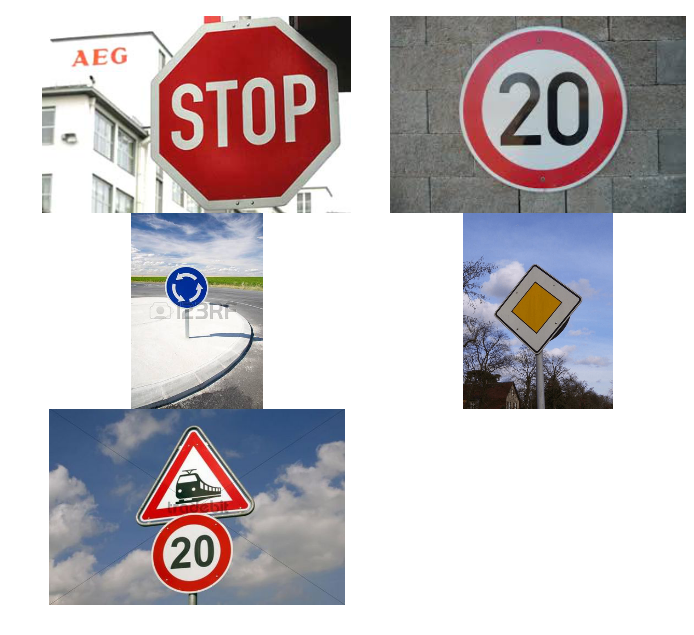

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

image_paths = ['stop.jpg',
               'single_sign_20.jpg',
               'roundabout_mandatory.jpg',
               'priority_road.png',
               'double_sign_20_train.jpg']
images = [ndimage.imread(image_path) for image_path in image_paths]

fig = plt.figure(figsize=(8.8, 7.6))
for k in range(len(images)):
    a=fig.add_subplot(3,2,k+1)
    img = images[k]
    plt.axis('off')
    imgplot = plt.imshow(img)
plt.subplots_adjust(wspace=0, hspace=0)

## Load small images and convert to grayscale

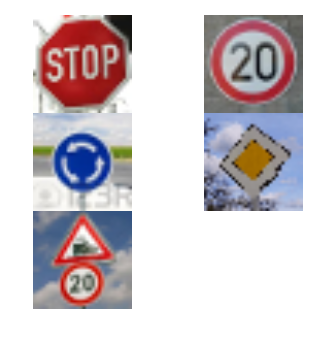

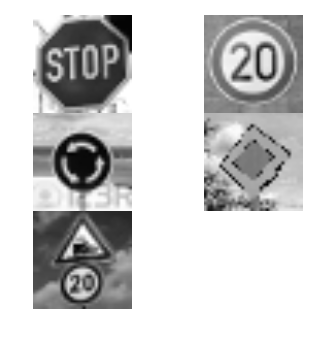

In [12]:
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

# Load images
image_paths2 = [path.split('.')[0] + "_small." + path.split('.')[1] for path in image_paths]
images = [ndimage.imread(image_path) for image_path in image_paths2]

# Show color
fig = plt.figure(figsize=(4.4, 3.8))
for k in range(len(images)):
    a=fig.add_subplot(3,2,k+1)
    img = images[k]
    plt.axis('off')
    imgplot = plt.imshow(img)
plt.subplots_adjust(wspace=0, hspace=0)

# Convert to gray
images2 = [rgb2gray(img) for img in images]

# Show gray
fig = plt.figure(figsize=(4.4, 3.8))
for k in range(len(images2)):
    a=fig.add_subplot(3,2,k+1)
    img = images2[k]
    plt.axis('off')
    imgplot = plt.imshow(img, cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0)

# Reformat the images so they can fit into the model
images2 = [rgb2gray(img).reshape(32,32,1).astype('float32') for img in images]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The first four images should be easy to classify, because they're nothing obstructing the view of the signs. The last image should be difficult to classify, because there are two signs in it. The watermark in the third image may affect the model's ability to classify it.

All the images will need to be preprocessed by extracting a square containing the sign from the image, and scaling the square to be 32x32 pixels.

## Use the model to predict the classes of the external images

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

tf.reset_default_graph()

IMAGES = images2

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
logits = LeNet(x)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./lenet.ckpt")
    results = sess.run(tf.nn.softmax(logits), feed_dict={x: IMAGES})
for result in results:
    print(np.argmax(result))

14
0
40
12
40


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model classified four of the images correctly. This means its accuracy was 80%. On the validation set, it's accuracy was over 98%.

|Sign| Model's prediction| True ID | Predicted ID
|-|-|-|-|-
|Stop|<font color='red'>Speed limit (50km/h)</font>|14|14
|Speed limit (20km/h)|Speed limit (20km/h)|0|0
|Roundabout mandatory|Roundabout mandatory|40|40
|Priority road|Priority road|12|12
|Speed limit (20km/h)|<font color='red'>Speed limit (100km/h)</font>|0|40

(14, 1.0)
(1, 1.5944236e-12)
(26, 7.1117163e-20)
(18, 1.0022277e-20)
(29, 1.1526535e-23)

(0, 1.0)
(1, 1.0105207e-11)
(28, 7.2697534e-23)
(31, 3.041366e-26)
(18, 4.1291031e-30)

(40, 1.0)
(2, 3.9856372e-09)
(7, 4.135742e-14)
(1, 1.245532e-22)
(8, 9.554001e-26)

(12, 1.0)
(0, 0.0)
(24, 0.0)
(25, 0.0)
(26, 0.0)

(40, 0.99998593)
(24, 1.4091324e-05)
(20, 1.0933181e-08)
(12, 1.0812959e-12)
(23, 2.9999048e-15)



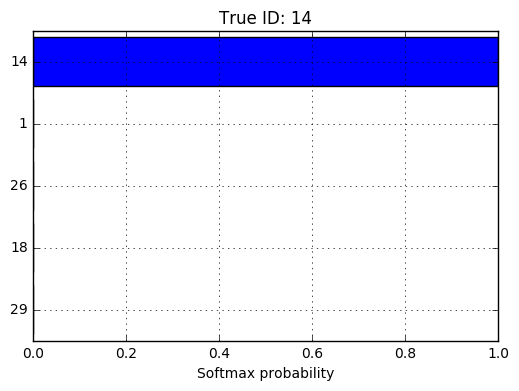

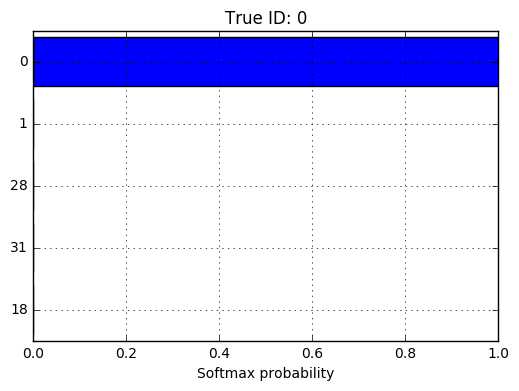

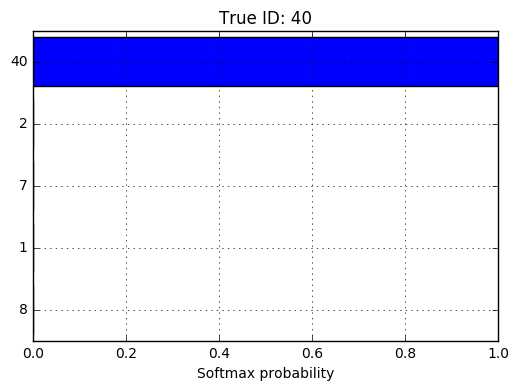

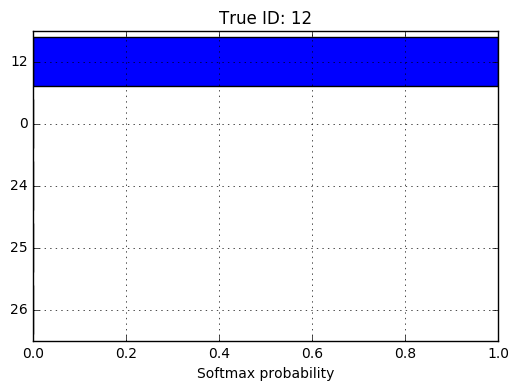

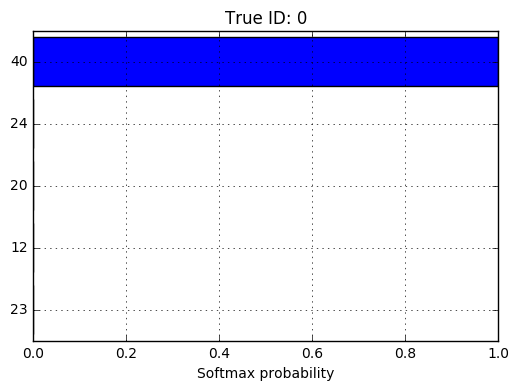

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

from pylab import *

true_IDs = [14, 0, 40, 12, 0]
true_IDs = [str(true_ID) for true_ID in true_IDs]

k = 5
count = 0
for result in results:
    
    top_k_idx = np.argsort(-result)[:k]
    top_k_p = result[[top_k_idx]]
    
    figure(count)
    pos = arange(5)+.5    # the bar centers on the y axis
    barh(pos, np.flipud(top_k_p), align='center')
    yticks(pos, np.flipud(top_k_idx))
    xlabel('Softmax probability')
    title('True ID: ' + true_IDs[count])
    grid(True)
    count += 1
    
    for z in zip(top_k_idx, top_k_p):
        print(z)
    print()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model had a near 100% certainty for all five of its predictions. However, it predicted the class of the last image incorrectly. And, the model assigned a softmax probability of far less than 1% to the correct class. The correct class wasn't in the model's top five guesses.

It's reasonable that the model guessed the class of the last image incorrectly, because there were two signs in it. However, the model's almost absolute certainty in its incorrect guess concerns me.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.